In [1]:
# import pandas as pd
# import numpy as np
# from keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.model_selection import train_test_split
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# import re
# from keras.utils import to_categorical
# from keras.models import Sequential
# from keras.layers import Embedding, LSTM, Dense
# from keras.callbacks import EarlyStopping
# import matplotlib.pyplot as plt
# from sklearn.metrics import classification_report
# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Dropout
# from keras.callbacks import EarlyStopping
# import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score, f1_score
# !pip install tensorflow==2.11.*
# import tensorflow as tf

# # Load data
# df = pd.read_csv('Reviews(13).csv')
# df

,review,Label
0,I do not know how you can say he is a doctor,Negative
1,He is not a doctor. Just know how to charge money,negative
2,Alhmdulillah positive experience,positive
3,Glad to have good experience,positive
4,Fair review.,Neutral
...,...,...
24430,I booked an appointment for my friend for 12:...,Negative
24431,Not treated in a good way,Negative
24432,Doctor Noor Samad khan was a great doctor and ...,Positive
24433,I feel he is not competent in the field of sex...,Negative


In [2]:


# ## Correcting the spelling of one misspelled label
# df['Label'] = df['Label'].str.replace('negative', 'Negative')
# df['Label'] = df['Label'].str.replace('neutral', 'Neutral')
# df['Label'] = df['Label'].str.replace('positive', 'Positive')
# df['Label'] = df['Label'].str.replace('Netural', 'Neutral')
# df['Label'] = df['Label'].str.replace(' Neutral', 'Neutral')

# df['Label'].unique()

# df['Label'].value_counts()

Positive    11730
Negative     9109
Neutral      3596
Name: Label, dtype: int64

In [29]:
# nltk.download('stopwords')
# nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
# # Preprocess the text data
# stop_words = set(stopwords.words('english'))
# def preprocess_text(text):
#     # Convert to lowercase
#     text = text.lower()
#     # Remove non-alphanumeric characters
#     text = re.sub(r'\W+', ' ', text)
#     # Remove stopwords
#     tokens = word_tokenize(text)
#     filtered_tokens = [token for token in tokens if token not in stop_words]
#     text = ' '.join(filtered_tokens)
#     return text
# df['review'] = df['review'].apply(preprocess_text)


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.utils import np_utils
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('Reviews(13).csv')

In [28]:


## Correcting the spelling of one misspelled label
df['Label'] = df['Label'].str.replace('negative', 'Negative')
df['Label'] = df['Label'].str.replace('neutral', 'Neutral')
df['Label'] = df['Label'].str.replace('positive', 'Positive')
df['Label'] = df['Label'].str.replace('Netural', 'Neutral')
df['Label'] = df['Label'].str.replace(' Neutral', 'Neutral')

df['Label'].unique()

df['Label'].value_counts()

Positive    11730
Negative     9109
Neutral      3596
Name: Label, dtype: int64

In [29]:
# Map the classes to 0, 1, and 2
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['Label'], test_size=0.2, random_state=42)


In [30]:
# Convert text to sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Pad sequences to a fixed length
max_length = max([len(seq) for seq in X_train])
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

# Convert target variable to categorical
num_classes = len(np.unique(y_train))
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)


In [31]:
# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128, input_length=max_length))
model.add(LSTM(units=128))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [32]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f%%' % (accuracy*100))


Epoch 1/20
306/306 [==============================] - 46s 133ms/step - loss: 0.8701 - accuracy: 0.6135 - val_loss: 0.6983 - val_accuracy: 0.7336
Epoch 2/20
306/306 [==============================] - 40s 130ms/step - loss: 0.7209 - accuracy: 0.7188 - val_loss: 0.6964 - val_accuracy: 0.7334
Epoch 3/20
306/306 [==============================] - 39s 127ms/step - loss: 0.7270 - accuracy: 0.7127 - val_loss: 0.7236 - val_accuracy: 0.7180
Epoch 4/20
306/306 [==============================] - 39s 129ms/step - loss: 0.7790 - accuracy: 0.6670 - val_loss: 0.7686 - val_accuracy: 0.6708
Epoch 5/20
306/306 [==============================] - 39s 127ms/step - loss: 0.7911 - accuracy: 0.6578 - val_loss: 0.7830 - val_accuracy: 0.6654
Epoch 6/20
306/306 [==============================] - 40s 130ms/step - loss: 0.8358 - accuracy: 0.6032 - val_loss: 0.9226 - val_accuracy: 0.5058
Epoch 7/20
306/306 [==============================] - 39s 128ms/step - loss: 0.9478 - accuracy: 0.4834 - val_loss: 0.9487 - val_ac

In [33]:
# Generate predictions
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Print classification report and confusion matrix
target_names = ['Negative', 'Neutral', 'Positive']
print(classification_report(y_test.argmax(axis=1), y_pred, target_names=target_names))
print(confusion_matrix(y_test.argmax(axis=1), y_pred))

153/153 [==============================] - 5s 27ms/step
              precision    recall  f1-score   support

    Negative       0.95      0.98      0.96      1822
     Neutral       0.91      0.93      0.92       683
    Positive       0.99      0.96      0.98      2382

    accuracy                           0.96      4887
   macro avg       0.95      0.96      0.95      4887
weighted avg       0.96      0.96      0.96      4887

[[1777   29   16]
 [  46  635    2]
 [  55   33 2294]]


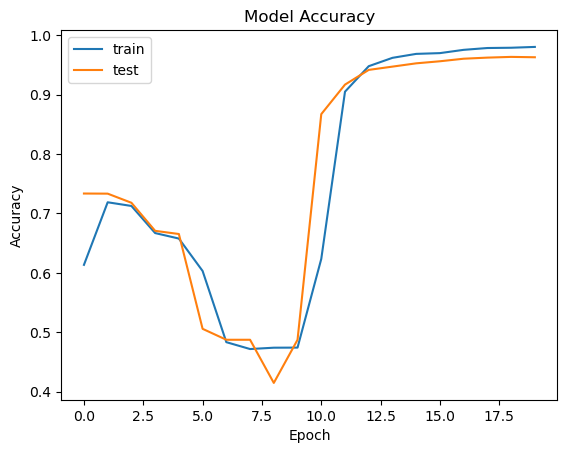

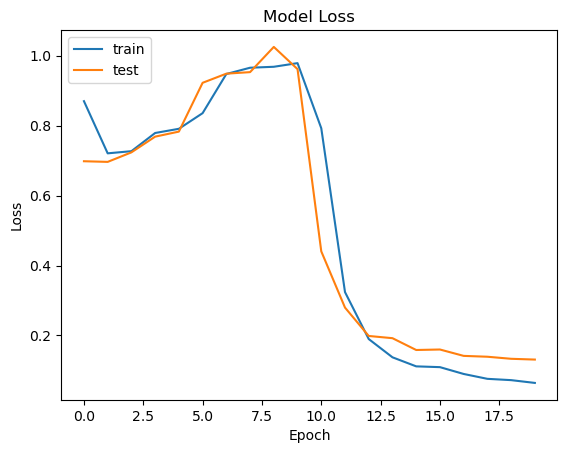

In [34]:
# Plot accuracy and loss curves
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
# Make predictions on new reviews
new_reviews = [
    "Doctor late tha magar doctor na acha tareeqa sa dekha.",
    "The doctor was terrible. I wouldn't recommend it to anyone.",
    "Acha experience raha.",
    "The doctor was okay, but the staff was not good."
]
new_reviews = tokenizer.texts_to_sequences(new_reviews)
new_reviews = pad_sequences(new_reviews, maxlen=max_length, padding='post')
new_pred = model.predict(new_reviews)
new_pred = np.argmax(new_pred, axis=1)

for i in range(len(new_reviews)):
    print('Review:', new_reviews[i])
    print('Predicted class:', label_encoder.inverse_transform([new_pred[i]])[0])
    print()


1/1 [==============================] - 0s 53ms/step
Review: [   1  139  111 1343    1  284  171 7563  390 1677    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
Predicted class: Negative

Review: [   4    1    3 2863    6 4234   59   23    7  322    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
Predicted class: Negative

Review: [171  12 315   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   